# Исследование тарифов сотовой связи

Для анализа предоставлена выборка клиентов оператора сотовой связи за год.

Задача: определить какой тариф из двух более выгоден (приносит больше прибыли), на основе анализа поведения клиентов.


## Изучение данных 

Импортируем необходимые для проекта библиотеки:

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy import stats as st


Информация содержится в пяти таблицах. Прочитаем их и сохраним в отдельных переменных **df** с добавлением описания в названии. Чтобы провести предварительную оценку данных, посмотрим первые строки и общую информацию.

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
pd.set_option("display.max_columns", None) #для отображения всех столбцов

display(df_calls.sample(10))
df_calls.info()

,id,call_date,duration,user_id
28808,1072_134,2018-04-14,3.38,1072
189537,1466_552,2018-08-12,5.89,1466
161341,1396_42,2018-09-01,6.81,1396
131981,1339_310,2018-10-11,0.00,1339
145882,1372_60,2018-08-11,13.12,1372
34969,1086_518,2018-05-25,0.00,1086
117284,1301_176,2018-12-02,0.00,1301
182590,1454_342,2018-07-09,10.53,1454
62869,1158_427,2018-09-23,3.19,1158
115350,1296_163,2018-06-30,13.41,1296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица **df_calls** состоит из 4 столбцов разного типа: 
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Пропуски отсутствуют. Проблем с названиями столбцов нет. 

Нужно изменить формат у столбца с датой звонка. Также мы округляем звонки в большую сторону до минут, поэтому в дальнейшем столбец `duration` округлим до целого в большую сторону и поменяем формат на *int*.

In [3]:
df_internet = pd.read_csv('/datasets/internet.csv')

display(df_internet.sample(10))
df_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
36804,36804,1127_154,606.96,2018-07-29,1127
18078,18078,1063_99,312.16,2018-08-08,1063
98079,98079,1330_287,350.90,2018-07-24,1330
9176,9176,1032_256,996.17,2018-03-12,1032
126612,126612,1425_141,121.48,2018-06-14,1425
63163,63163,1215_69,0.00,2018-09-03,1215
62080,62080,1210_189,206.17,2018-09-21,1210
53731,53731,1180_222,357.90,2018-05-09,1180
70811,70811,1240_479,637.17,2018-03-02,1240
62215,62215,1211_48,0.00,2018-11-09,1211


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица **df_internet** состоит из 5 столбцов разного типа: 
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Также, похоже, что индекс дублируется в отдельном столбце.


Пропуски отсутствуют. Проблем с названиями столбцов нет. 

Нужно изменить формат у столбца с датой интернет сессии. Трафик оставляем с текущим типом, округлим после получения сводных сумм за месяц.


In [4]:
df_messages = pd.read_csv('/datasets/messages.csv')

display(df_messages.sample(10))
df_messages.info()

,id,message_date,user_id
55024,1244_190,2018-08-02,1244
120091,1485_57,2018-12-31,1485
13246,1055_212,2018-10-18,1055
39834,1170_24,2018-12-21,1170
19855,1088_145,2018-12-02,1088
121047,1490_269,2018-06-01,1490
1228,1004_282,2018-10-25,1004
83267,1346_178,2018-10-27,1346
33593,1146_391,2018-10-18,1146
22111,1092_392,2018-12-01,1092


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



Таблица **df_messages** состоит из 3 столбцов разного типа и 123 036 строк: 
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Пропуски отсутствуют. Проблем с названиями столбцов нет. 

Нужно изменить формат у столбца с датой сообщения, так же, как в предыдущих таблицах. 

In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

display(df_tariffs.head())
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица **df_tariffs** состоит из 8 столбцов: 
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Пропуски отсутствуют. Проблем с названиями столбцов и форматом нет. 

In [6]:
df_users = pd.read_csv('/datasets/users.csv')

display(df_users.head())
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
print('В таблице данные', df_users['user_id'].count(), 'абонентов с user_id в диапазоне: ', df_users['user_id'].min(), '-', df_users['user_id'].max())

В таблице данные 500 абонентов с user_id в диапазоне:  1000 - 1499



Таблица **df_users** состоит из 8 столбцов разного типа: 
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Пропуски присутствуют только в столбце с датой прекращения использования тафрифа. Проблем с названиями столбцов нет. 

Нужно изменить формат у столбцов с датами, заполнить пропуски в `churn_date` необходимости нет, т.к. эта информация в рамках данного проекта не используется. 

Имеем в распоряжении 5 таблиц с информацией о пользовании услугами мобильной связи (минуты, мегабайты, сообщения) с детализацией по пользователям, а также данные самих пользователей.

## Предобработка данных

### Изменения типа данных

В нескольких таблицах есть даты, небходимо поправить тип данных, чтобы комфортно с нимим работать. Заодно приведем к целочисленному типу данные в некторых столбцах, используя округление, если это нужно.


Согласно тарифу, каждый разговор округляется в большую сторону до целых минут. Поэтому в таблице со звонками округлим длительность в большую сторону и поменяем формат на целочисленный. Также изменим формат в столбце с датой.

In [8]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') #приводим к формату дата
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype(int) #округляем минуты до целого в большую сторону и переводим в целочисленный формат

Поменяем формат столбцов с датой и в остальных таблицах.


In [9]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

### Поиск и исправление ошибок

Посмотрим нет ли в имеющихся данных дубликатов.

In [10]:
print(df_users.duplicated().sum())
print(df_messages.duplicated().sum())
print(df_internet.duplicated().sum())
print(df_calls.duplicated().sum())

0
0
0
0


Явных дубликатов нет.

Проверим данные в таблицах на наличие ошибок. Используем метод `describe`.

**Звонки**



In [11]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


Средний звонок составляет 6 минут. Максимальный 38, минимальный - 0 (возможно, это неотвеченные/пропущенные вызовы). Каких-то аномалий не замечено.

**Интернет**

In [12]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Здесь нас итересует столбец с трафиком. Разброс значений от нуля до 1,7Гб за сессию. В среднем расход составляет 370 мб, что близко в медианному значению в 350 мб.

**Сообщения**



В таблице с сообщениями каждая строка соответствует одному сообщению. Как выяснили ранее, пропусков нет, проблем с названиями в столбцах так же нет.

### Группировка

Выделим в отдельные новые столбцы месяц и год из даты операции.

In [13]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['year'] = df_calls['call_date'].dt.year
display(df_calls.head())

,id,call_date,duration,user_id,month,year
0,1000_0,2018-07-25,0,1000,7,2018
1,1000_1,2018-08-17,0,1000,8,2018
2,1000_2,2018-06-11,3,1000,6,2018
3,1000_3,2018-09-21,14,1000,9,2018
4,1000_4,2018-12-15,6,1000,12,2018


Сгруппируем данные в таблице по абоненту, году и месяцу, чтобы получить информацию по количеству использованных минут по месяцам.

In [14]:
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'year', 'month'], values='duration', aggfunc=['sum', 'count']).reset_index()
df_calls_pivot = df_calls_pivot.rename(columns={"duration":"", "sum":"duration_total", "count":"number_of_calls"}) #уберем двойные названия столбцов и переименуем столбцы
df_calls_pivot.columns = [t[0] if t[0] else t[1] for t in df_calls_pivot.columns]

display(df_calls_pivot.head(10))
df_calls_pivot.info()

,user_id,year,month,duration_total,number_of_calls
0,1000,2018,5,159,22
1,1000,2018,6,172,43
2,1000,2018,7,340,47
3,1000,2018,8,408,52
4,1000,2018,9,466,58
5,1000,2018,10,350,57
6,1000,2018,11,338,43
7,1000,2018,12,333,46
8,1001,2018,11,430,59
9,1001,2018,12,414,63


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 5 columns):
user_id            3174 non-null int64
year               3174 non-null int64
month              3174 non-null int64
duration_total     3174 non-null int64
number_of_calls    3174 non-null int64
dtypes: int64(5)
memory usage: 124.1 KB


Проделаем аналогичные действия с данными о сообщениях и интернет трафике.

In [15]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['year'] = df_internet['session_date'].dt.year
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'year', 'month'], values='mb_used', aggfunc='sum').reset_index()

display(df_internet_pivot.head(10))

,user_id,year,month,mb_used
0,1000,2018,5,2253.49
1,1000,2018,6,23233.77
2,1000,2018,7,14003.64
3,1000,2018,8,14055.93
4,1000,2018,9,14568.91
5,1000,2018,10,14702.49
6,1000,2018,11,14756.47
7,1000,2018,12,9817.61
8,1001,2018,11,18429.34
9,1001,2018,12,14036.66


Т.к. каждой строке в таблице с сообщениями соответствует одно отправленное сообщение, то при группировке  применим функцию `count`, чтобы посчитать количество сообщений.

In [16]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages['year'] = df_messages['message_date'].dt.year
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'year', 'month'], values='message_date', aggfunc='count').reset_index()
display(df_messages_pivot.head(10))

,user_id,year,month,message_date
0,1000,2018,5,22
1,1000,2018,6,60
2,1000,2018,7,75
3,1000,2018,8,81
4,1000,2018,9,57
5,1000,2018,10,73
6,1000,2018,11,58
7,1000,2018,12,70
8,1002,2018,6,4
9,1002,2018,7,11


In [17]:
df_messages_pivot = df_messages_pivot.rename(columns={"message_date":"number_of_messages"}) #переименуем столбец

### Объединение таблиц

Объединим данные из отдельных таблиц в одну.

За основу возьмём таблицу с id абонентов df_users и удалим часть столбцов.

In [18]:
df_merged = df_users.drop(['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff'], 1)

display(df_merged.head())

,user_id
0,1000
1,1001
2,1002
3,1003
4,1004


Добавим к исходной таблице данные о трафике

In [19]:
df_merged = df_merged.merge(df_internet_pivot, how='outer', on = 'user_id')
display(df_merged.head())


,user_id,year,month,mb_used
0,1000,2018.0,5.0,2253.49
1,1000,2018.0,6.0,23233.77
2,1000,2018.0,7.0,14003.64
3,1000,2018.0,8.0,14055.93
4,1000,2018.0,9.0,14568.91


Проверим все ли строки заполнены.

In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 3205
Data columns (total 4 columns):
user_id    3206 non-null int64
year       3203 non-null float64
month      3203 non-null float64
mb_used    3203 non-null float64
dtypes: float64(3), int64(1)
memory usage: 125.2 KB


Округлим трафик до гигабайт в большую сторону, что соответствует условиям тарифа.

In [22]:
df_merged['mb_used'] = np.ceil(df_merged['mb_used'] / 1024) #переводим мегабайты в гигабайты
display(df_merged.head(10))

,user_id,year,month,mb_used
0,1000,2018.0,5.0,3.0
1,1000,2018.0,6.0,23.0
2,1000,2018.0,7.0,14.0
3,1000,2018.0,8.0,14.0
4,1000,2018.0,9.0,15.0
5,1000,2018.0,10.0,15.0
6,1000,2018.0,11.0,15.0
7,1000,2018.0,12.0,10.0
8,1001,2018.0,11.0,18.0
9,1001,2018.0,12.0,14.0


Добавим данные из таблиц с сообщениями и звонками.

In [23]:
df_merged = df_merged.merge(df_messages_pivot, how='outer', on = ['user_id', 'year', 'month'])
df_merged = df_merged.merge(df_calls_pivot, how='outer', on = ['user_id', 'year', 'month'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3217 entries, 0 to 3216
Data columns (total 7 columns):
user_id               3217 non-null int64
year                  3214 non-null float64
month                 3214 non-null float64
mb_used               3203 non-null float64
number_of_messages    2717 non-null float64
duration_total        3174 non-null float64
number_of_calls       3174 non-null float64
dtypes: float64(6), int64(1)
memory usage: 201.1 KB


В столбцах с количеством минут, трафиком, количеством звонков присутствуют пропуски. Наиболее вероятно, что в этих месяцах абоненты не пользовались данным видом услуг. Заполним пропуски нулями.

In [24]:
df_merged.fillna({'mb_used': 0, 'number_of_messages':0, 'number_of_calls': 0, 'duration_total':0}, inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3217 entries, 0 to 3216
Data columns (total 7 columns):
user_id               3217 non-null int64
year                  3214 non-null float64
month                 3214 non-null float64
mb_used               3217 non-null float64
number_of_messages    3217 non-null float64
duration_total        3217 non-null float64
number_of_calls       3217 non-null float64
dtypes: float64(6), int64(1)
memory usage: 201.1 KB


Добавим индивидуальные данные пользователей и информацию по тарифам.

In [25]:
df_merged = df_merged.merge(df_users, how='outer', on = 'user_id')
df_merged = df_merged.merge(df_tariffs, how='outer', left_on='tariff', right_on='tariff_name')


Переведем в гигабайты сумму включенного в лимит трафика по тарифу. И изменим тип данных в столбцах `float` на `int`

In [26]:
df_merged['mb_per_month_included'] = np.ceil(df_merged['mb_per_month_included'] / 1024)
df_merged[['mb_used', 'number_of_messages', 'duration_total', 'number_of_calls', 'mb_per_month_included']] = df_merged[['mb_used', 'number_of_messages', 'duration_total', 'number_of_calls', 'mb_per_month_included']].astype(int)
display(df_merged.head())
df_merged.info()

,user_id,year,month,mb_used,number_of_messages,duration_total,number_of_calls,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018.0,5.0,3,22,159,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
1,1000,2018.0,6.0,23,60,172,43,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
2,1000,2018.0,7.0,14,75,340,47,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
3,1000,2018.0,8.0,14,81,408,52,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
4,1000,2018.0,9.0,15,57,466,58,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3217 entries, 0 to 3216
Data columns (total 22 columns):
user_id                  3217 non-null int64
year                     3214 non-null float64
month                    3214 non-null float64
mb_used                  3217 non-null int64
number_of_messages       3217 non-null int64
duration_total           3217 non-null int64
number_of_calls          3217 non-null int64
age                      3217 non-null int64
churn_date               189 non-null object
city                     3217 non-null object
first_name               3217 non-null object
last_name                3217 non-null object
reg_date                 3217 non-null datetime64[ns]
tariff                   3217 non-null object
messages_included        3217 non-null int64
mb_per_month_included    3217 non-null int64
minutes_included         3217 non-null int64
rub_monthly_fee          3217 non-null int64
rub_per_gb               3217 non-null int64
rub_per_message      

    
По три позиции в столбцах с годом и месяцем пропущены. Выведем их для просмотра.


In [27]:
display(df_merged[df_merged['month'].isna()].head())

,user_id,year,month,mb_used,number_of_messages,duration_total,number_of_calls,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
243,1128,NaN,NaN,0,0,0,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30,3000,1950,150,1,1,ultra
477,1273,NaN,NaN,0,0,0,0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
2620,1371,NaN,NaN,0,0,0,0,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15,500,550,200,3,3,smart



По первому и третьему договору видим, что регистрация и прекращение действия произошли в одном месяце - декабре. Заменим пропуски в столбце месяц на "12", а год на "2018". Но вначале поподробнее посмотрим на третьего абонента.

In [28]:
display(df_merged.query('first_name == "Рэм" & last_name == "Корнилов"').head(10))

,user_id,year,month,mb_used,number_of_messages,duration_total,number_of_calls,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
477,1273,NaN,NaN,0,0,0,0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
478,1273,2018.0,5.0,0,21,220,24,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
479,1273,2018.0,6.0,0,38,230,40,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
480,1273,2018.0,7.0,0,37,253,44,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
481,1273,2018.0,8.0,0,41,253,53,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
482,1273,2018.0,9.0,0,32,223,33,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
483,1273,2018.0,10.0,0,35,315,40,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
484,1273,2018.0,11.0,0,29,272,45,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra
485,1273,2018.0,12.0,0,39,260,41,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30,3000,1950,150,1,1,ultra


Видим, что договор зарегистрирован в мае 2018 г, и есть данные за все остальные месяцы до конца года. Строка с пропусками не несет какой-то полезной информации - можем её удалить.
После заполнения пропусков сможем изменить на целочисленный тип в столбцах месяц и год

In [29]:
df_merged = df_merged.drop(df_merged[(df_merged['first_name'] == "Рэм") & (df_merged['month'] != df_merged['month'])].index) #удаляем строку 
df_merged['year'] = df_merged['year'].fillna(2018) #заполняем оставшиеся два пропуска в столбце год на "2018"
df_merged['month'] = df_merged['month'].fillna(12) #заполняем оставшиеся два пропуска в столбце месяц на "12"
df_merged[['year', 'month']] = df_merged[['year', 'month']].astype(int)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3216
Data columns (total 22 columns):
user_id                  3216 non-null int64
year                     3216 non-null int64
month                    3216 non-null int64
mb_used                  3216 non-null int64
number_of_messages       3216 non-null int64
duration_total           3216 non-null int64
number_of_calls          3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          

Чтобы сравнивать тарифы, нам необходимо иметь выручку по абонентам. Напишем функцию `revenue_count`, которая будет производить расчет всех затрат абонента за месяц.

- сравниваем количество испольованных минут/гигабайт/сообщений с количеством, включенным в соответствующий тариф;
- если лимит превышен, то умножаем величину превышения лимита на стоимость за единицу соответствующей услуги;
- добавляем полученную сумму к абонентской плате - получаем итоговую выручку по абоненту, которую вносим в столбец `revenue`.

In [30]:
def revenue_count (row):
    revenue = row['rub_monthly_fee']
    if row['duration_total'] > row['minutes_included']:
        revenue += (row['duration_total'] - row['minutes_included']) * row['rub_per_minute']
#        return revenue
    if row['number_of_messages'] > row['messages_included']:
        revenue += (row['number_of_messages'] - row['messages_included']) * row['rub_per_message']
#        return revenue
    if row['mb_used'] > row['mb_per_month_included']:
        revenue += (row['mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'] 
#        return revenue
    return revenue

df_merged['revenue'] = df_merged.apply(revenue_count, axis = 1)
display(df_merged.sample(10))
df_merged.info()

,user_id,year,month,mb_used,number_of_messages,duration_total,number_of_calls,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
382,1225,2018,7,20,0,521,82,71,NaN,Оренбург,Даниэла,Горбачева,2018-04-26,ultra,1000,30,3000,1950,150,1,1,ultra,1950
2094,1238,2018,12,18,31,112,11,57,NaN,Ростов-на-Дону,Радислав,Наумов,2018-01-08,smart,50,15,500,550,200,3,3,smart,1150
3033,1462,2018,11,23,0,933,126,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart,50,15,500,550,200,3,3,smart,3449
1141,1032,2018,10,15,35,385,60,31,NaN,Ульяновск,Инна,Игнатьева,2018-01-04,smart,50,15,500,550,200,3,3,smart,550
122,1081,2018,6,25,19,618,91,42,NaN,Москва,Софья,Терехова,2018-03-25,ultra,1000,30,3000,1950,150,1,1,ultra,1950
2186,1262,2018,9,21,31,362,43,21,NaN,Ульяновск,Антонина,Ларина,2018-03-17,smart,50,15,500,550,200,3,3,smart,1750
2709,1393,2018,2,7,16,171,26,56,NaN,Краснодар,Артём,Зубков,2018-02-17,smart,50,15,500,550,200,3,3,smart,550
2848,1421,2018,12,15,36,335,40,30,NaN,Калининград,Гайдар,Александрович,2018-02-22,smart,50,15,500,550,200,3,3,smart,550
3068,1470,2018,12,18,11,492,58,23,NaN,Новокузнецк,Эллада,Лосева,2018-10-19,smart,50,15,500,550,200,3,3,smart,1150
2435,1317,2018,8,16,37,659,86,45,NaN,Москва,Всеволод,Зыков,2018-07-09,smart,50,15,500,550,200,3,3,smart,1227


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3216
Data columns (total 23 columns):
user_id                  3216 non-null int64
year                     3216 non-null int64
month                    3216 non-null int64
mb_used                  3216 non-null int64
number_of_messages       3216 non-null int64
duration_total           3216 non-null int64
number_of_calls          3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          

Проверим нет ли случаев, когда расчетная выручка оказалась меньше абонентской платы.

In [31]:
df_merged[['revenue', 'rub_monthly_fee']].query('revenue < rub_monthly_fee').sum()

revenue            0
rub_monthly_fee    0
dtype: int64

Подобных ситуаций нет, выручка всегда больше или равна абонентской плате. 

## Анализ данных

В выборке присутствует 500 уникальных абонентов. Посмотрим как они распределились между тарифами.

In [32]:
print('Абонентов с тарифом "smart":', df_users.query('tariff == "smart"')['tariff'].count())
print('Абонентов с тарифом "ultra":', df_users.query('tariff == "ultra"')['tariff'].count())

Абонентов с тарифом "smart": 351
Абонентов с тарифом "ultra": 149


Рассчитаем общую выручку по каждому из тарифов. 

In [33]:
print('Суммарная выручка всех абонентов тарифа "smart":', df_merged.query('tariff == "smart"')['revenue'].sum())
print('Суммарная выручка всех абонентов тарифа "ultra":', df_merged.query('tariff == "ultra"')['revenue'].sum())

Суммарная выручка всех абонентов тарифа "smart": 2875901
Суммарная выручка всех абонентов тарифа "ultra": 2041050


Пользователи более дорогого тарифа ultra составляют примерно 30% выборки.
При этом выручка по этому тарифу составляет примерно 42%.

Посчитаем средние значения по фактическому расходу минут, смс и гигабайт по каждому из тарифов. 

In [34]:
df_merged_pivot = df_merged.pivot_table(index='tariff', values=['duration_total', 'number_of_messages', 'mb_used', 'revenue'], aggfunc=['mean', 'median']).round(2)
display(df_merged_pivot)

mean                                             median  \
       duration_total mb_used number_of_messages  revenue duration_total   
tariff                                                                     
smart          417.75   16.32              33.37  1289.64          421.5   
ultra          526.09   19.47              49.31  2070.03          518.0   

                                           
       mb_used number_of_messages revenue  
tariff                                     
smart       17                 28    1021  
ultra       19                 38    1950

В ultra большое кол-во абонентов укладывается в рамки тарифа - медианная выручка = стоимости тарифа. И отличие от среднего значения не очень велико. В smart же отличия очень существенные. Большинство абонентов используют доп.услуги сверх предоставленного пакета. Причем среднее значение выручки существенно больше медианы, это говорит о том, что выборка существенно смещена вправо. Это логично, т.к. есть нижний порог - абонентская плата, и все возможные выбросы и сильные отклонения возможны только в большую сторону.


### Минуты

Посмотрим некоторые параметры распределения количества использованных минут в разбивке по тарифам с помощью `describe`.

In [35]:
print(df_merged.query('tariff == "smart"')['duration_total'].describe())
print(df_merged.query('tariff == "ultra"')['duration_total'].describe())

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: duration_total, dtype: float64
count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: duration_total, dtype: float64


Среднее количество использованных минут ожидаемо выше в тарифе ultra. При этом в четверти случаев абоненты в обоих тарифах использует не более 280 минут в месяц.  Более чем в 25% случаев в тарифе smart не укладываются в установленный лимит.

Рассчитаем дисперсию и стандартное отклонение.
т.к. выборка, используем дополнительно параметр `ddof=1`

In [36]:
print('Дисперсия "smart":', np.var(df_merged.query('tariff == "smart"')['duration_total'], ddof=1))
print('Стандарстное отклонение "smart":', np.std(df_merged.query('tariff == "smart"')['duration_total'], ddof=1))
print('Дисперсия "ultra":', np.var(df_merged.query('tariff == "ultra"')['duration_total'], ddof=1))
print('Стандарстное отклонение "ultra":', np.std(df_merged.query('tariff == "ultra"')['duration_total'], ddof=1))

Дисперсия "smart": 36281.39383644458
Стандарстное отклонение "smart": 190.4767540579285
Дисперсия "ultra": 101052.49354928387
Стандарстное отклонение "ultra": 317.8875485911392


Оценим диапазон, в который попадают подавляющее большинство значений.

In [37]:
print(' 99% значений выборки лежат в диапазоне +/- 3 ст.отклонения от средней, т.е. для тарифа "smart" от 0 до', df_merged.query('tariff == "smart"')['duration_total'].mean() + np.std(df_merged.query('tariff == "smart"')['duration_total'], ddof=1)*3)
print(' Для тарифа "ultra" от 0 до', df_merged.query('tariff == "ultra"')['duration_total'].mean() + np.std(df_merged.query('tariff == "ultra"')['duration_total'], ddof=1)*3)

 99% значений выборки лежат в диапазоне +/- 3 ст.отклонения от средней, т.е. для тарифа "smart" от 0 до 989.1777958060725
 Для тарифа "ultra" от 0 до 1479.7518952663181


Найдем подтверждение этому на гистограмме. Границы диапазона выберем на основе полученных ранее методом `describe` данных. 

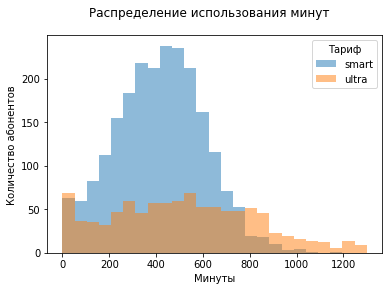

In [38]:
bins = np.linspace(0, 1300, 26)

plt.hist(df_merged.query('tariff == "smart"')['duration_total'], bins, alpha=0.5, label='smart')
plt.hist(df_merged.query('tariff == "ultra"')['duration_total'], bins, alpha=0.5, label='ultra')
plt.legend(loc='upper right', title= 'Тариф')
plt.suptitle("Распределение использования минут")
plt.xlabel("Минуты")
plt.ylabel("Количество абонентов")
plt.show()

Основная часть значений в диапазоне от ноля до 900, правее лишь небольшая доля.

В тарифе ultra распределение более равномерное: количество случаев, когда абоненты тратили от 0 до 800 минут примерно на одном уровне. Распределение в тарифе smart близко к нормальному: большая чать абонентов использует 200-600 минут. При этом заметно, что в ultra не часто выходят за рамки лимита, в то время как в smart доля таких абонентов существенная. 

In [39]:
print('Количество случаев, когда абоненты превышали порог в 500 минут:', df_merged.query('tariff == "smart" & duration_total > 500')['duration_total'].count())
print('Доля таких случаев:', (df_merged.query('tariff == "smart" & duration_total > 500')['duration_total'].count() / df_merged.query('tariff == "smart"')['duration_total'].count()).round(3))

Количество случаев, когда абоненты превышали порог в 500 минут: 754
Доля таких случаев: 0.338


Почти 34% случаев абонентам тарифа smart приходится использовать минуты сверх установленного лимита.

### Сообщения

Проведем аналогичный анализ по использованию сообщений в обоих тарифах.


Снова воспользуемся `describe`. Отдельно рассчитывать стандартное отклонение не будем, т.к. оно уже есть в перечне результатов этого метода.

In [40]:
print(df_merged.query('tariff == "smart"')['number_of_messages'].describe())
print(df_merged.query('tariff == "ultra"')['number_of_messages'].describe())

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: number_of_messages, dtype: float64
count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: number_of_messages, dtype: float64


Ситуация схожа со звонками: примерно в 75 % случаев абоненты тарифа smart укладываются в установленный лимит, но четверти этого не хватает. Среднее превышает медиану в обоих тарифах - есть смещение выборки вправо.

В тарифе ultra никто не использует даже 25% от предоставленного лимита. 

In [41]:
print(' 99% значений для тарифа "smart" укладываются в диапазон от 0 до', df_merged.query('tariff == "smart"')['number_of_messages'].mean() + np.std(df_merged.query('tariff == "smart"')['number_of_messages'], ddof=1)*3)
print(' Для тарифа "ultra" от 0 до', df_merged.query('tariff == "ultra"')['number_of_messages'].mean() + np.std(df_merged.query('tariff == "ultra"')['number_of_messages'], ddof=1)*3)

 99% значений для тарифа "smart" укладываются в диапазон от 0 до 118.06024615852168
 Для тарифа "ultra" от 0 до 192.73150629983786


Перенесем данные на гистограмму 

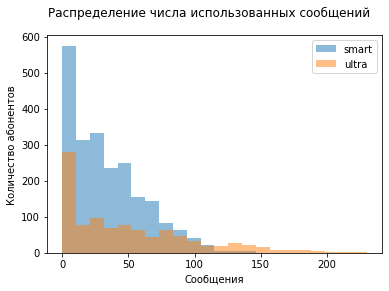

In [42]:
bins = np.linspace(0, 230, 23)

plt.hist(df_merged.query('tariff == "smart"')['number_of_messages'], bins, alpha=0.5, label='smart')
plt.hist(df_merged.query('tariff == "ultra"')['number_of_messages'], bins, alpha=0.5, label='ultra')
plt.suptitle("Распределение числа использованных сообщений")
plt.xlabel("Сообщения")
plt.ylabel("Количество абонентов")
plt.legend(loc='upper right')
plt.show()

Распределения похожи: чаще всего абоненты используют в пределах 70 сообщений. Но если в ultra это лишь небольшая часть от лимита, то в smart доля заметная. Наиболее многочисленные группы в обоих тарифах не используют сообщения совсем, либо не более 10 штук в месяц.


In [43]:
print('Количество случаев, когда абоненты "smart" превышали порог в 50 сообщений:', df_merged.query('tariff == "smart" & number_of_messages > 50')['number_of_messages'].count())
print('Доля таких случаев:', (df_merged.query('tariff == "smart" & number_of_messages > 50')['number_of_messages'].count() / df_merged.query('tariff == "smart"')['number_of_messages'].count()).round(3))

Количество случаев, когда абоненты "smart" превышали порог в 50 сообщений: 564
Доля таких случаев: 0.253


Примерно в 25% случаев абонентам тарифа smart приходится доплачивать за смс.

### Трафик

Далее исследуем использовнаие трафика.

In [44]:
print(df_merged.query('tariff == "smart"')['mb_used'].describe())
print(df_merged.query('tariff == "ultra"')['mb_used'].describe())

count    2230.000000
mean       16.321525
std         5.756167
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: mb_used, dtype: float64
count    986.000000
mean      19.474645
std        9.868057
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: mb_used, dtype: float64


Среднее близко к медиане, существенных выбросов быть не должно. Стандартное отклонение в более дорогом тарифе почти в два раза больше.  В тарифе smart в более 50% случаев приобретается дополнительный траффик, в ultra более 75% укладываются в отведенный лимит. 


Построим гистограмму.

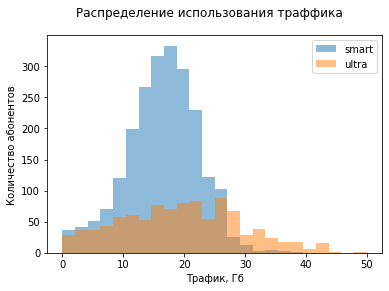

In [45]:
bins = np.linspace(0, 50, 25)

plt.hist(df_merged.query('tariff == "smart"')['mb_used'], bins, alpha=0.5, label='smart')
plt.hist(df_merged.query('tariff == "ultra"')['mb_used'], bins, alpha=0.5, label='ultra')
plt.suptitle("Распределение использования траффика")
plt.xlabel("Трафик, Гб")
plt.ylabel("Количество абонентов")
plt.legend(loc='upper right')
plt.show()

Распределени более бюджетного тарифа близко к нормальному - центр распределения находится примерно на 15-19 Гб. У ultra ситуация похожа на данные по минутам: распределение более равномерное.

Гистограмма наглядно показывает, что чаще всего в smart используют более 15Гб, указанных в тарифе. Посчитаем эту долю точнее.

In [46]:
print('Количество случаев, когда абоненты превышали порог в 15Гб:', df_merged.query('tariff == "smart" & mb_used > 15')['mb_used'].count())
print('Доля таких случаев:', (df_merged.query('tariff == "smart" & mb_used > 15')['mb_used'].count() / df_merged.query('tariff == "smart"')['mb_used'].count()).round(3))

Количество случаев, когда абоненты превышали порог в 15Гб: 1304
Доля таких случаев: 0.585


Почти 60% приобретают дополнительные гигабайты трафика в тарифе smart.

Расчитаем аналогичные показатели для ultra.

In [47]:
print('Количество случаев, когда абоненты превышали порог в 30Гб:', df_merged.query('tariff == "ultra" & mb_used > 30')['mb_used'].count())
print('Доля таких случаев:', (df_merged.query('tariff == "ultra" & mb_used > 30')['mb_used'].count() / df_merged.query('tariff == "ultra"')['mb_used'].count()).round(3))

Количество случаев, когда абоненты превышали порог в 30Гб: 134
Доля таких случаев: 0.136


Доля существенно меньше, т.е. большинству хватает 30 Гб.

### Выручка

Оценим рассмотренные по отдельности выше параметы в совокупности по выручке.

In [48]:
print(df_merged.query('tariff == "smart"')['revenue'].describe())
print(df_merged.query('tariff == "ultra"')['revenue'].describe())

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64
count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64


Среднее немного превышает медиану в тарифе ultra, т.к. большинство значений, в т.ч. и медиана, равны фиксированному тарифу, а немногочисленные дополнительные расходы смещают выборку правее. В тарифе smart сдвиг вправо гораздо заметнее.

Визуализируем данные по выручке.

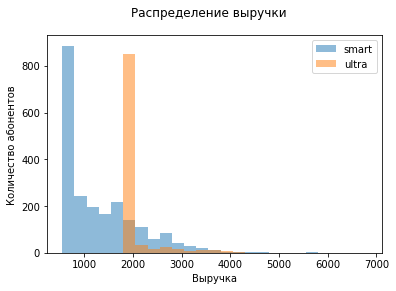

In [49]:
bins = np.linspace(550, 6800, 26)

plt.hist(df_merged.query('tariff == "smart"')['revenue'], bins, alpha=0.5, label='smart')
plt.hist(df_merged.query('tariff == "ultra"')['revenue'], bins, alpha=0.5, label='ultra')
plt.suptitle("Распределение выручки")
plt.xlabel("Выручка")
plt.ylabel("Количество абонентов")
plt.legend(loc='upper right')
plt.show()

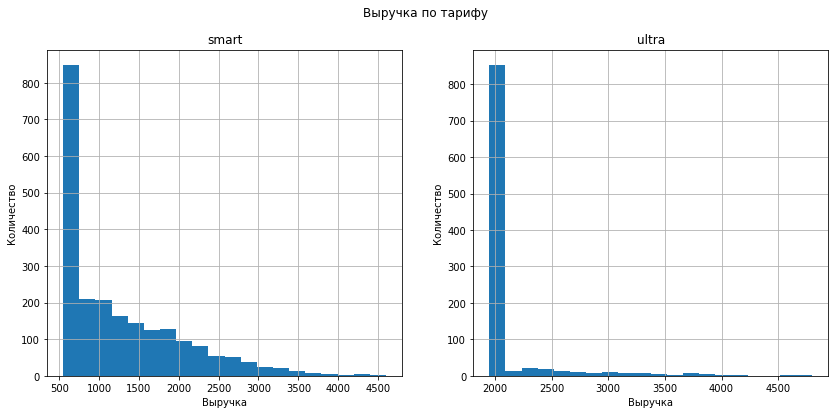

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Выручка по тарифу')

ax1.hist(df_merged.query('tariff == "smart"')['revenue'], bins=20, range=(550, 4600))
ax1.grid(True)
ax1.set_title('smart')
ax1.set_xlabel('Выручка')
ax1.set_ylabel('Количество')


ax2.hist(df_merged.query('tariff == "ultra"')['revenue'], bins=20, range=(1950, 4800))
ax2.grid(True)
ax2.set_title('ultra')
ax2.set_xlabel('Выручка')
ax2.set_ylabel('Количество')
plt.show()


Гистаграммы наглядно демонстрируют полученные ранее заключения: бОльшая часть абонентов в тарифе ultra не использует услуги сверх базового тарифа. В тарифе smart обратная ситуация - большей части приходится выходить за рамки установленного тарифом лимита.

In [51]:
print('Количество случаев, когда абоненты smart платили более 550р в месяц:', df_merged.query('tariff == "smart" & revenue > 550')['revenue'].count())
print('Доля таких случаев:', (df_merged.query('tariff == "smart" & revenue > 550')['revenue'].count() / df_merged.query('tariff == "smart"')['revenue'].count()).round(3))

print('Количество случаев, когда абоненты smart платили более 1950р в месяц:', df_merged.query('tariff == "smart" & revenue > 1950')['revenue'].count())
print('Доля таких случаев:', (df_merged.query('tariff == "smart" & revenue > 1950')['revenue'].count() / df_merged.query('tariff == "smart"')['revenue'].count()).round(3))

print('Количество случаев, когда абоненты ultra платили более 1950р в месяц:', df_merged.query('tariff == "ultra" & revenue > 1950')['revenue'].count())
print('Доля таких случаев:', (df_merged.query('tariff == "ultra" & revenue > 1950')['revenue'].count() / df_merged.query('tariff == "ultra"')['revenue'].count()).round(3))

Количество случаев, когда абоненты smart платили более 550р в месяц: 1662
Доля таких случаев: 0.745
Количество случаев, когда абоненты smart платили более 1950р в месяц: 417
Доля таких случаев: 0.187
Количество случаев, когда абоненты ultra платили более 1950р в месяц: 134
Доля таких случаев: 0.136


Почти в 75% случаев абонентам smart приходилось тратить дополнительные средства, при этом примерно в 19% случаев это были суммы больше абонентской платы по тарифу ultra.

**Вывод**

В тарифе smart большая доля пользователей не укладывается в установленные лимиты и приобретает дополнительные услуги. Примерно четветь по минутам и сообщениям, и особенно это заметно на использовании трафика - почти 60%.

При этом примерно 81% абонентов smart даже при использовании дополнительных услуг тратят меньше, чем абонентская плата по тарифу ultra.

## Выдвижение и проверка гипотез

Выдвенем две гипотезы о генеральной совокупности и проверим их на предоставленной выборке.

### Гипотеза №1 Средняя выручка по тарифам Smart и Ultra различается. 

Сравним среднюю выручку в тарифах Smart и Ultra. Сформулируем нулевую и альтернативную гипотезы. В нулевой гипотезе должен присутствовать знак равенства: 

**Нулевая гипотеза $Н_{0}$** - Средняя выручка по тарифам Smart и Ultra не различается.

**Альтернативная гипотеза $Н_{1}$** - Средняя выручка по тарифам Smart и Ultra различается. Альтернативная гипотеза двухсторонняя - нам не важно в какую сторону будет отклонение, важен сам факт наличия отклонения, т.е. то, что средняя выручка по тарифам не равна.

Принимать или отвергать нулевую гипотезу будем по **p-value** - это вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии, что нулевая гипотеза верна.

Установим уровень значимости — суммарную вероятность того, что измеренное эмпирически значение окажется далеко от среднего - равным 0,05.

Т.к. проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind 


In [52]:
alpha = 0.05 

results = st.ttest_ind(df_merged.query('tariff == "smart"')['revenue'], df_merged.query('tariff == "ultra"')['revenue']) 

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.081909555489933e-161
Отвергаем нулевую гипотезу


Вероятность такого события равна нулю или мала настолько, что близка к нулю. Мы можем отвергнуть нулевую гипотезу - средняя выручка по тарифам различается.

### Гипотеза №2 Средняя выручка в Москве и других регионах отличается.

Проведем сравнение средней выручки без разбивки по тарифам в Москве и средней выручки в других регионах.

**Нулевая гипотеза $Н_{0}$** - Средняя выручка в Москве не отличается от средней выручки в других регионах.

Альтернативная гипотеза таже будет двухсторонней:

**Альтернативная гипотеза $Н_{1}$** - Средняя выручка в Москве и регионах отличаются. 

Уровень значимости установим на том же уровне - 0,05.

In [53]:
alpha = 0.05 

results = st.ttest_ind(df_merged.query('city == "Москва"')['revenue'], df_merged.query('city != "Москва"')['revenue']) 

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Исследования гипотез показывают, что с большой долей вероятности средняя выручка между тарифами различается. Выручка в Москве и остальных регионах может быть схожей.

При этом данное исследование не может утверждать со 100%-й вероятностью этот факт, оно лишь показывает, что вероятность совпадения средних выручек крайне мала.


## Общий вывод

Провели исседование двух тарифов сотовой связи на основе выборки из генеральной совокупности данных о пользовании услугами за 2018 год. Основной задачей было сравнить выручку по тарифам и определить, какой тариф прибыльнее: Smart с абонентской платой 550 рублей в месяц, но более высокой платой за единицу дополнительных услуг сверх предоставленного пакета, или Ultra за 1950 рублей в месяц.


Тариф Ultra включает достаточно большой объем услуг, большинству абонентов его хватает. Лишь в 14% случаев абоненты данного тарифы прибегают к дополнительным тратам. Абоненты же тарифа Smart используют дополнительные минуты, сообщения и трафик гораздо чаще - почти в каждом третьем случае из четырех. А примерно в 19% случаев сумма затрат за месяц по тарифу smart даже превышала абонентскую плату по тарифу ultra.  Но все же, несмотря на существенные дополнительные затраты, большинство абонентов smart (82%) в своих тратах укладываются в диапазон до абонентской платы ultra, т.е. в 550-1950 рублей. 




Рассмотрели гипотезы о равенстве средней выручки между тарифами, а также равенстве средней выручки по Моске и остальным регионам. Первая гипотеза не нашла подтверждения, вторая в большой долей вероятности может быть верной.



По результатам данного исследования можем сделать вывод: тариф Ultra гораздо выгоднее для оператора. Несмотря на то, что в тарифе smart приобретается гораздо больше дополнительных услуг, базовая абонентская плата тарифа ultra позволяет ему компенсировать отсутствие или минимальное количество дополнительных трат абонентов. При этом основным источником дополнительных доходов в тарифе ultra является трафик. Ни один из абонентов не использовал даже четверти включенных в пакет сообщений, и только единицы использовали более 50% предоставленных минут.


Возможно стоит рассмотреть вариант с уменьшением стоимости тарифа ultra, что привлечет часть пользователей smart, которые находятся в пограничной по тратам зоне и существенно превышают лимиты по своему текущему тарифу. Это может дать более высокую стабильную и прогнозируемую выручку. 

Варьировать стоимость и привлекательность тарифа можно за счет изменения пакета трафика. Судя по представленным данным, это наиболее ценный ресурс. 

